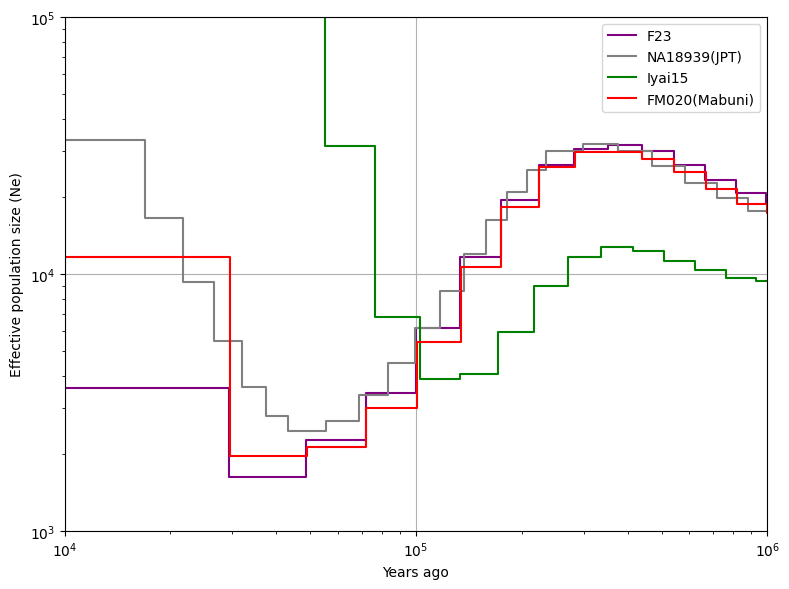

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the mutation rate and generation time
mu = 1.25e-8
gen = 30

# Function to read and process MSMC2 data
def process_msmc2_data(sample_name):
    file_path = f'/home/mkato/hdd_data/data/2-msmc/{sample_name}/effective_population_size_file/{sample_name}.msmc2.final.txt'
    df = pd.read_csv(file_path, delimiter='\t')
    df['Years_ago'] = df['left_time_boundary'] / mu * gen
    df['Ne'] = (1 / df['lambda']) / (2 * mu)
    return df

# Read and process the data
df1 = process_msmc2_data('F23')
df2 = process_msmc2_data('NA18939')
df3 = process_msmc2_data('I15')
df4 = process_msmc2_data('FM020_sorted')

# Plotting both datasets on the same graph
plt.figure(figsize=(8, 6))
plt.step(df1['Years_ago'], df1['Ne'], where='post', color='purple', label='F23')
plt.step(df2['Years_ago'], df2['Ne'], where='post', color='gray', label='NA18939(JPT)')
plt.step(df3['Years_ago'], df3['Ne'], where='post', color='green', label='Iyai15')
plt.step(df4['Years_ago'], df4['Ne'], where='post', color='red', label='FM020(Mabuni)')


# Set log scale for both axes and axis limits
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**4, 10**6)
plt.ylim(10**3, 10**5)

# Adding labels and title
plt.xlabel('Years ago')
plt.ylabel('Effective population size (Ne)')
#plt.title('Effective Population Size (Ne)')

# Adding the legend
plt.legend(loc='upper right')

# Show the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


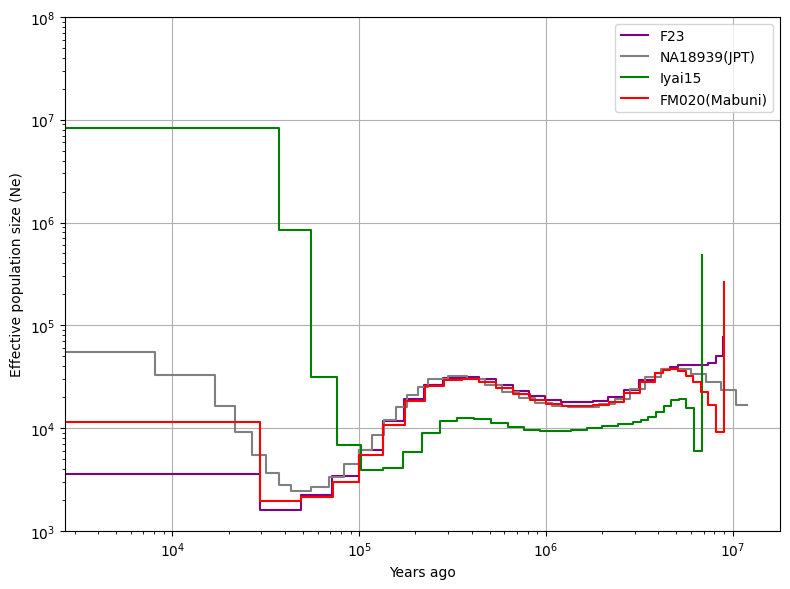

In [7]:
# Plotting both datasets on the same graph
plt.figure(figsize=(8, 6))
plt.step(df1['Years_ago'], df1['Ne'], where='post', color='purple', label='F23')
plt.step(df2['Years_ago'], df2['Ne'], where='post', color='gray', label='NA18939(JPT)')
plt.step(df3['Years_ago'], df3['Ne'], where='post', color='green', label='Iyai15')
plt.step(df4['Years_ago'], df4['Ne'], where='post', color='red', label='FM020(Mabuni)')


# Set log scale for both axes and axis limits
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.xlabel('Years ago')
plt.ylabel('Effective population size (Ne)')
#plt.title('Effective Population Size (Ne)')
plt.ylim(10**3, 10**8)

# Adding the legend
plt.legend(loc='upper right')

# Show the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()